In [6]:
import numpy as np
import pandas as pd

def jack(f,X,n):
    h = 0.000001
    arr1 = []
    for i in range(n):
        arr2 = []
        for j in range(n):
            lhsx = X.copy()
            lhsx[j] += h
            rhsx = X.copy()
            rhsx[j] -= h
            arr2.append((f(lhsx)[i,0]-f(rhsx)[i,0])/(2*h))
        arr1.append(arr2)
    return np.array(arr1)

def main(f, x_ini = None, n = 2, range_ = [1,5], max_itr = 100, epsilon = 0.0000001, precision = 15):
    try:
        if x_ini == None:
            initial = np.random.uniform(range_[0], range_[1],n)
        else :
            initial = np.array(x_ini)
    except :
        initial = np.array(x_ini)
    print('Initial value taken as \n', initial, '\n')
    
    #third order
    X = initial.copy()
    ct = 1
    third_order_cache = []
    while np.linalg.norm(f(X)) > epsilon and ct < max_itr :
        #print(' itr_ct = ', ct,'\n','Soln = ',X)
        third_order_cache.append(np.linalg.norm(f(X)))
        x_k = np.array([[i] for i in X])
        y_k = x_k - 0.5*np.linalg.inv(jack(f,X,n))@f(X)
        Y = np.squeeze(y_k)
        X = np.squeeze(x_k - np.linalg.inv(jack(f,Y,n))@f(X))
        ct += 1
    X = [round(i,precision) for i in X]
    x= pd.DataFrame(np.reshape(X, (2,n1)).T)
    print('For Third order model Solution is ', '\n', x,'\n')
    third_order_cache.append(np.linalg.norm(f(X)))
    
    
    #sixth order
    X = initial.copy()
    ct = 1
    sixth_order_cache = []
    while np.linalg.norm(f(X)) > epsilon and ct < max_itr :
        sixth_order_cache.append(np.linalg.norm(f(X)))
        x_k = np.array([[i] for i in X])
        y_k = x_k - np.linalg.inv(jack(f,X,n))@f(X)
        Y = np.squeeze(y_k)
        z_k = y_k - np.linalg.inv(jack(f,X,n))@(2*np.eye(n) - jack(f,Y,n)\
                            @np.linalg.inv(jack(f,X,n)))@f(Y)
        Z = np.squeeze(z_k)
        X = np.squeeze(z_k - np.linalg.inv(jack(f,Y,n))@f(Z))
        ct += 1
    X = [round(i,precision) for i in X]
    x= pd.DataFrame(np.reshape(X, (2,n1)).T)
    print('For Sixth order model Solution is ','\n', x,'\n')
    sixth_order_cache.append(np.linalg.norm(f(X)))
    
    #fifth order
    X = initial.copy()
    ct = 1
    fifth_order_cache = []
    while np.linalg.norm(f(X)) > epsilon and ct < max_itr :
        fifth_order_cache.append(np.linalg.norm(f(X)))
        x_k = np.array([[i] for i in X])
        y_k = x_k - np.linalg.inv(jack(f,X,n))@f(X)
        Y = np.squeeze(y_k)
        z_k = x_k - 2*np.linalg.inv(jack(f,X,n)+jack(f,Y,n))@f(X)
        Z = np.squeeze(z_k)
        X = np.squeeze(z_k - np.linalg.inv(jack(f,Y,n))@f(Z))
        ct += 1
    X = [round(i,precision) for i in X]
    x= pd.DataFrame(np.reshape(X, (2,n1)).T)
    print('For Fifth order model Solution is ', '\n',x, '\n')
    fifth_order_cache.append(np.linalg.norm(f(X)))
    
    #proposed model 
    #modified fifth order
    X = initial.copy()
    ct = 1
    modified_fifth_order_cache = []
    while np.linalg.norm(f(X)) > epsilon and ct < max_itr :
        
        modified_fifth_order_cache.append(np.linalg.norm(f(X)))
        x_k = np.array([[i] for i in X])
        jacobian = jack(f,X,n)
        
        a = True
        while a:
            f_x = np.squeeze(f(X))
        
            lambd = np.random.uniform(-1,1,n)
            for i in range(n):
                if f_x[i]*jacobian[i,i] >= 0:
                    lambd[i] = abs(lambd[i])
                elif f_x[i]*jacobian[i,i] < 0:
                    lambd[i] = -abs(lambd[i])

            try :
                b = np.linalg.inv(np.diag(lambd*f_x)+jack(f,X,n))
                a = False
            except :
                pass
            
        y_k = x_k - 0.5*b@f(X)
        Y = np.squeeze(y_k)
        
        a = True
        while a:
            mu = np.random.uniform(-0.01, 0.01, n)
            for i in range(n):
                if jacobian[i,i] >= 0:
                    mu[i] = abs(mu[i])
                else:
                    mu[i] = -abs(mu[i])                
            try :
                c = np.linalg.inv(np.diag(mu*f_x*f_x)+jack(f,Y,n)+jack(f,X,n))
                a = False
            except :
                pass
        
        z_k = x_k - 2*c@f(X)
        Z = np.squeeze(z_k)
        
        jacobian = jack(f,Y,n)
        a = True
        while a:
            f_y = np.squeeze(f(Y))
        
            eta = np.random.uniform(-0.01,0.01,n)
            for i in range(n):
                if f_y[i]*jacobian[i,i] >= 0:
                    eta[i] = abs(eta[i])
                else:
                    eta[i] = -abs(eta[i])

            try :
                b = np.linalg.inv(np.diag(eta*f_y)+jack(f,Y,n))
                a = False
            except :
                pass
            
        X = np.squeeze(z_k - b@f(Z))
        ct += 1
    X = [round(i,precision) for i in X]
    x= pd.DataFrame(np.reshape(X, (2,n1)).T)
    print('For Modified Proposed Fifth order model Solution is ', '\n',x, '\n')
    modified_fifth_order_cache.append(np.linalg.norm(f(X)))    
    
    return [third_order_cache, fifth_order_cache, sixth_order_cache, modified_fifth_order_cache], X

def convergence_viewer(li):
    pad = len(max(li, key=len))
    data_df = np.array([i + [0]*(pad-len(i)) for i in li])
    df = pd.DataFrame(data_df.T, columns=['3rd', '5th', '6th', 'Mo 5th'])
    df.plot(figsize = (10,10))
    return df

Initial value taken as 
 [3.58069777 2.48509936 4.13902332 2.28814549 3.38853023 1.95913278
 2.61680381 1.97462419 2.99020832 3.45584537] 

For Third order model Solution is  
        0       1
0  0.240   0.000
1  0.000  17.404
2  1.635  -0.000
3  3.846   0.000
4 -0.000   6.442 

For Sixth order model Solution is  
        0       1
0  0.240   0.000
1  0.000  17.404
2  1.635   0.000
3  3.846  -0.000
4  0.000   6.442 

For Fifth order model Solution is  
        0       1
0  0.351   0.585
1 -5.059   4.604
2  5.539  -9.259
3  5.880 -10.382
4 -0.542  14.139 

For Modified Proposed Fifth order model Solution is  
             0           1
0  -33428.109  -22167.081
1  -66026.239  -58391.482
2  143046.484 -164999.560
3  -41055.279 -135683.771
4  -95675.085      -0.978 



,3rd,5th,6th,Mo 5th
0,513.900302,513.900302,5.139003e+02,5.139003e+02
1,52.463685,1413.424163,2.846733e+09,1.349183e+02
2,9.515956,1665.399730,1.313987e+08,1.339782e+02
3,0.243770,182.655177,6.065067e+06,4.353061e+02
4,0.000002,17178.335852,2.799359e+05,2.725445e+04
5,0.000005,846.606153,1.290794e+04,3.379790e+06
6,0.000032,64.213932,5.848173e+02,8.331400e+05
7,0.000022,10928.742471,1.942725e+01,1.491208e+06
8,0.000014,526.922972,3.571554e+00,2.335654e+06
9,0.000051,15.903697,4.635104e-05,2.218941e+06


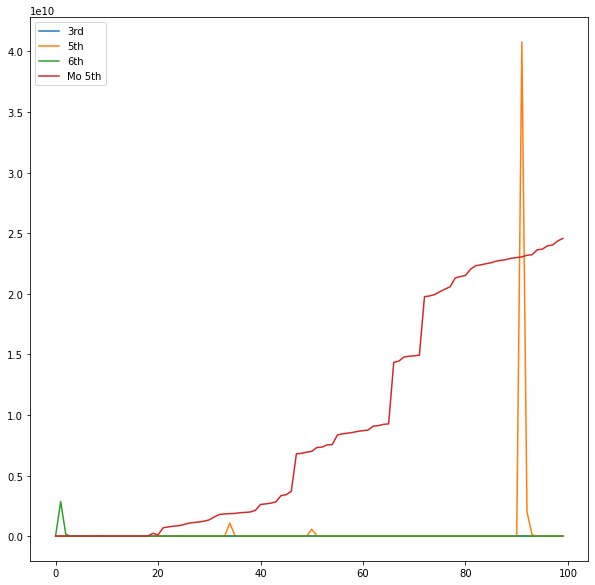

In [7]:
st = 'Problem1_5x5.csv'
df1 = pd.read_csv(st, header=None)
A = np.array(df1.iloc[:,:-1])
q = np.array(df1.iloc[:,-1:])
n1 = len(q)
def neg_relu(x):
    if x > 0:
        return 0
    else:
        return -x
def f(x):
    ind = 0
    res = []
    for ind in range(n1):
        b = np.squeeze(A[ind])
        val = np.dot(b,x[:n1]) + q[ind] - x[n1 + ind]
        res.append(val[0])
        val1 = abs(x[n1 + ind]*x[ind]) + neg_relu(x[n1 + ind]) + neg_relu(x[ind])
        res.append(val1)
    return np.reshape(np.array(res),(2*n1,1))

x = [3.58069777, 2.48509936, 4.13902332, 2.28814549, 3.38853023, 1.95913278,\
 2.61680381, 1.97462419, 2.99020832, 3.45584537] 

li,_ = main(f, x_ini=x, n=n1*2, max_itr= 100, epsilon= 0.000001, precision= 3)
convergence_viewer(li).head(10)

Initial value taken as 
 [22.80131895 21.79207665 23.86543339 18.61029054 16.54479706] 



ValueError: cannot reshape array of size 5 into shape (2,5)